In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/안전한 인공지능/release_10_23_2020.csv'
df = pd.read_csv(file_path)

# 기초 분석

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433611 entries, 0 to 5433610
Data columns (total 6 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   session_id_hash            object
 1   event_type                 object
 2   product_action             object
 3   product_skus_hash          object
 4   server_timestamp_epoch_ms  int64 
 5   hashed_url                 object
dtypes: int64(1), object(5)
memory usage: 248.7+ MB


In [ ]:
# 결측값의 개수를 확인합니다.
df.isnull().sum()

,0
session_id_hash,0
event_type,0
product_action,2918789
product_skus_hash,3547557
server_timestamp_epoch_ms,0
hashed_url,0


product_action이 결측치인 곳에 pageview로 채워주고 event_type피처 drop해서 df1에 저장

In [ ]:
# 'product_action' 열에 결측값이 있는 데이터 추출
missing_product_action = df[df['product_action'].isnull()]

# 결측값 중 'event_type'이 'pageview'인 비율 계산
pageview_ratio = missing_product_action['event_type'].value_counts(normalize=True).get('pageview', 0)

print(f"'product_action' 열의 결측값 중 'pageview' 비율: {pageview_ratio:.2%}")

'product_action' 열의 결측값 중 'pageview' 비율: 99.87%


In [ ]:
# 'product_action'이 결측치이고 'event_type'이 'pageview'인 행 찾기
missing_mask = df['product_action'].isnull() & (df['event_type'] == 'pageview')

# 찾은 행의 'product_action'을 'pageview'로 채우기
df.loc[missing_mask, 'product_action'] = 'pageview'

# 'event_type' 열 삭제
df1 = df.drop('event_type', axis=1)

In [ ]:
# 결측값의 개수를 확인합니다.
df1.isnull().sum()

,0
session_id_hash,0
product_action,3652
product_skus_hash,3547557
server_timestamp_epoch_ms,0
hashed_url,0


In [ ]:
# 'product_action' 열에 결측치를 가진 데이터를 제거합니다.
df1.dropna(subset=['product_action'], inplace=True)

In [ ]:
# 결측값의 개수를 확인합니다.
df1.isnull().sum()

,0
session_id_hash,0
product_action,0
product_skus_hash,3543905
server_timestamp_epoch_ms,0
hashed_url,0


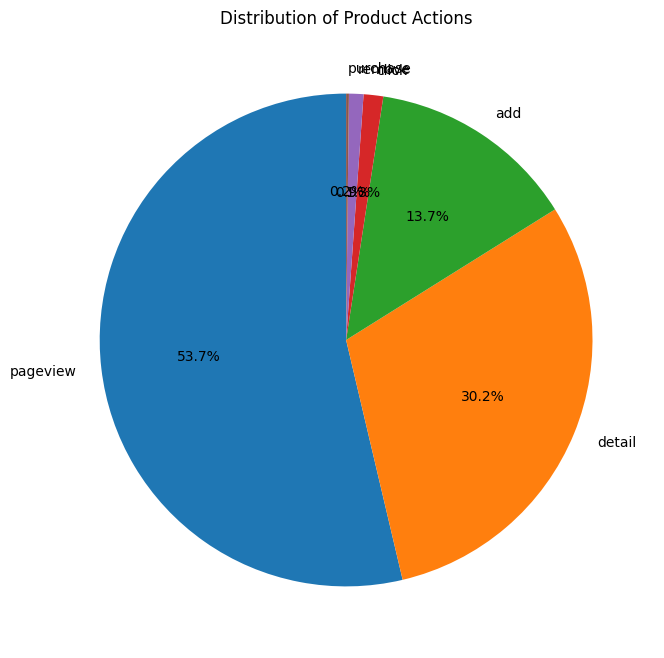

1


,Product Action,Count,Percentage
0,pageview,2915137,53.686170
1,detail,1640190,30.206305
2,add,743363,13.690030
3,click,69831,1.286032
4,remove,51512,0.948663
5,purchase,9926,0.182801


1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 'product_action' 열의 값들의 개수를 계산합니다.
product_action_counts = df1['product_action'].value_counts()

# 파이 차트를 생성합니다.
plt.figure(figsize=(8, 8))  # 원하는 크기로 설정
plt.pie(product_action_counts, labels=product_action_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Product Actions')
plt.show()

# product_action_counts를 데이터프레임으로 변환합니다.
product_action_df = pd.DataFrame({'Product Action': product_action_counts.index, 'Count': product_action_counts.values})

# Percentage 열 추가
total_count = product_action_counts.sum()
product_action_df['Percentage'] = (product_action_df['Count'] / total_count) * 100
print(1)
# 데이터프레임을 표 형태로 출력합니다.
display(product_action_df)
print(1)

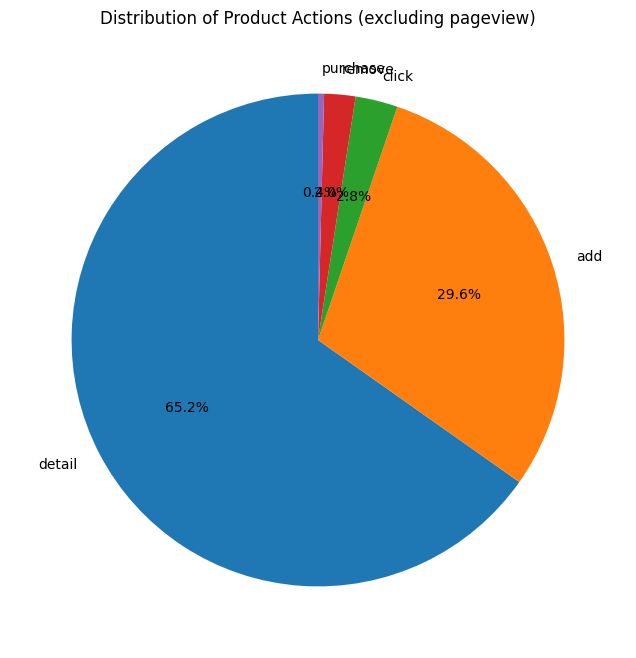

1


,Product Action,Count,Percentage
0,detail,1640190,65.220918
1,add,743363,29.559269
2,click,69831,2.776777
3,remove,51512,2.048336
4,purchase,9926,0.394700


1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 'pageview'를 제외한 데이터 추출
filtered_df = df1[df1['product_action'] != 'pageview']

# 'product_action' 열의 값들의 개수를 계산합니다.
product_action_counts = filtered_df['product_action'].value_counts()

# 파이 차트를 생성합니다.
plt.figure(figsize=(8, 8))  # 원하는 크기로 설정
plt.pie(product_action_counts, labels=product_action_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Product Actions (excluding pageview)')
plt.show()

# product_action_counts를 데이터프레임으로 변환합니다.
product_action_df = pd.DataFrame({'Product Action': product_action_counts.index, 'Count': product_action_counts.values})

# Percentage 열 추가
total_count = product_action_counts.sum()
product_action_df['Percentage'] = (product_action_df['Count'] / total_count) * 100
print(1)
# 데이터프레임을 표 형태로 출력합니다.
display(product_action_df)
print(1)

In [ ]:
# 'product_action'이 'purchase'인 session_id_hash 추출
purchase_session_ids = df1[df1['product_action'] == 'purchase']['session_id_hash'].unique()

In [ ]:
# session_id_hash별 액션 개수 계산
session_action_counts = df1.groupby('session_id_hash')['product_action'].count()

# 액션 개수가 6개 이하인 session_id_hash 선택
filtered_session_ids = session_action_counts[session_action_counts <= 6].index

# purchase_session_ids 중에서 filtered_session_ids에 있는 session_id_hash만 선택
selected_session_ids = purchase_session_ids[pd.Series(purchase_session_ids).isin(filtered_session_ids)]

# 선택한 session_id_hash에 대한 데이터 추출
sample_data = df1[df1['session_id_hash'].isin(selected_session_ids)]

# session_id_hash와 server_timestamp_epoch_ms로 정렬
sorted_data = sample_data.sort_values(by=['session_id_hash', 'server_timestamp_epoch_ms'])

In [ ]:
# 각 session_id_hash에 대한 데이터를 별도의 표로 출력
for session_id in sorted_data['session_id_hash'].unique():
    session_data = sorted_data[sorted_data['session_id_hash'] == session_id]
display(session_data[['session_id_hash', 'server_timestamp_epoch_ms', 'product_action']])

,session_id_hash,server_timestamp_epoch_ms,product_action
5429993,ffd1f84bb855bce9e9b8e8f700e1d8098aab50e6,1544427390421,detail
5429994,ffd1f84bb855bce9e9b8e8f700e1d8098aab50e6,1544427412106,detail
5429995,ffd1f84bb855bce9e9b8e8f700e1d8098aab50e6,1544427444177,pageview
5429996,ffd1f84bb855bce9e9b8e8f700e1d8098aab50e6,1544427454934,pageview
5429997,ffd1f84bb855bce9e9b8e8f700e1d8098aab50e6,1544427500266,pageview
5429998,ffd1f84bb855bce9e9b8e8f700e1d8098aab50e6,1544427587003,purchase


# 전처리

## product_action 결측치 처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433611 entries, 0 to 5433610
Data columns (total 6 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   session_id_hash            object
 1   event_type                 object
 2   product_action             object
 3   product_skus_hash          object
 4   server_timestamp_epoch_ms  int64 
 5   hashed_url                 object
dtypes: int64(1), object(5)
memory usage: 248.7+ MB


In [ ]:
# 결측값의 개수를 확인합니다.
df.isnull().sum()

,0
session_id_hash,0
event_type,0
product_action,3652
product_skus_hash,3547557
server_timestamp_epoch_ms,0
hashed_url,0


product_action이 결측치인 곳에 pageview로 채워주고 event_type피처 drop해서 df1에 저장

In [ ]:
# 'product_action'이 결측치이고 'event_type'이 'pageview'인 행 찾기
missing_mask = df['product_action'].isnull() & (df['event_type'] == 'pageview')

# 찾은 행의 'product_action'을 'pageview'로 채우기
df.loc[missing_mask, 'product_action'] = 'pageview'

# 'event_type' 열 삭제
df1 = df.drop('event_type', axis=1)

# 'product_action' 열에 결측치를 가진 데이터를 제거합니다.
df1.dropna(subset=['product_action'], inplace=True)

In [ ]:
# 결측값의 개수를 확인합니다.
df1.isnull().sum()

,0
session_id_hash,0
product_action,0
product_skus_hash,3543905
server_timestamp_epoch_ms,0
hashed_url,0


## 구매여부 피처 만들기

In [ ]:
# 예시: 구매 여부 컬럼 만들기
df1['is_purchase'] = (df1['product_action'] == 'purchase').astype(int)
target_df = df1.groupby('session_id_hash')['is_purchase'].max().reset_index()

## product_action 원핫인코딩

In [ ]:
# 피처: 각 세션에서 각 행동의 횟수
simple_features = df.pivot_table(
    index='session_id_hash',
    columns='product_action',
    aggfunc='size',
    fill_value=0
).reset_index()

# 타겟 결합
final_df = pd.merge(simple_features, target_df, on='session_id_hash')
final_df.drop('purchase', axis=1, inplace=True)
final_df.head(5)

,session_id_hash,add,click,detail,pageview,remove,is_purchase
0,00000005c19449b57d8d05dfc8b5474be0654032,0,0,0,1,0,0
1,00006a0ada94a5186163a25e9ed9c94481c820d9,0,0,0,1,0,0
2,00007d15aeb741b3cdd873cb3933351d699cc320,0,0,3,4,0,0
3,0000c49d1359c87f112285d63a9fc0d4c50f73b4,0,0,0,3,0,0
4,0001135282dbaf0e734345212ea6f8da9f5b66ed,0,0,0,1,0,0


## 5이상 155이하 세션만 남기기

In [ ]:
# 각 세션의 행동 횟수 계산
session_counts = final_df.drop(['session_id_hash', 'is_purchase'], axis=1).sum(axis=1)

# 조건에 맞는 세션 ID 추출
filtered_session_ids = session_counts[(session_counts > 5) & (session_counts < 155)].index

# final_df에서 해당 세션 ID만 남기기
final_df_filtered = final_df.loc[filtered_session_ids]

# 결과 확인
final_df_filtered.head(5)

,session_id_hash,add,click,detail,pageview,remove,is_purchase
2,00007d15aeb741b3cdd873cb3933351d699cc320,0,0,3,4,0,0
5,00014c4428e61aca7e64be1064d2b6cf49233cfb,0,1,2,12,0,0
13,00033ce5ea7a3c31c62320c4631860fcf638f5b3,0,0,3,5,0,0
14,0003537cea83b232652aa2d29f90fec46e523443,0,0,5,7,0,0
16,0003704e248795ae33f6cbe62b082cce4a011d4d,0,0,0,6,0,0


In [ ]:
final_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183098 entries, 2 to 443656
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   session_id_hash  183098 non-null  object
 1   add              183098 non-null  int64 
 2   click            183098 non-null  int64 
 3   detail           183098 non-null  int64 
 4   pageview         183098 non-null  int64 
 5   remove           183098 non-null  int64 
 6   is_purchase      183098 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 11.2+ MB


## 심볼화

In [ ]:
# 클릭 행동 유형을 숫자 코드로 매핑
symbol_map = {
    'pageview': 1,
    'detail': 2,
    'add': 3,
    'remove': 4,
    'purchase': 5,
    'click': 6
}

# 일단 결측치는 심볼 0 부여.
df1['event_symbol'] = df1['product_action'].map(symbol_map).fillna(0).astype(int)

In [ ]:
df1[['session_id_hash','product_action','event_symbol']]

,session_id_hash,product_action,event_symbol
0,00000005c19449b57d8d05dfc8b5474be0654032,pageview,1
1,00006a0ada94a5186163a25e9ed9c94481c820d9,pageview,1
2,00007d15aeb741b3cdd873cb3933351d699cc320,pageview,1
3,00007d15aeb741b3cdd873cb3933351d699cc320,pageview,1
4,00007d15aeb741b3cdd873cb3933351d699cc320,detail,2
...,...,...,...
5433606,ffffc2bce69fd5da3e9998fd5c788450a726ba4d,detail,2
5433607,ffffc2bce69fd5da3e9998fd5c788450a726ba4d,pageview,1
5433608,ffffc776defb14e6ba4c2635ba87251cb414573c,pageview,1
5433609,ffffce103f74909ba29cc8f4e40d82583b2e1898,pageview,1


 세션 길이 기준 필터링 및 라벨링

In [ ]:
# 1. 세션별 클릭 수 계산
session_lengths = df.groupby('session_id_hash').size()

# 5. 구매 발생 세션에서 첫 purchase 시점까지만 남기기
def truncate_at_first_purchase(group):
    if (group['product_action'] == 'purchase').any():
        # Use 'server_timestamp_epoch_ms' to find the index of the first purchase
        idx = group[group['product_action'] == 'purchase']['server_timestamp_epoch_ms'].idxmin()
        return group.loc[:idx]
    else:
        return group

df1 = df1.sort_values(by=['session_id_hash', 'server_timestamp_epoch_ms'])  # 정렬 필수
df1 = df1.groupby('session_id_hash', group_keys=False).apply(truncate_at_first_purchase)

<ipython-input-34-d18d1ff920a1>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1 = df1.groupby('session_id_hash', group_keys=False).apply(truncate_at_first_purchase)


In [ ]:
# 세션 단위로 시퀀스 만들기
def get_sequence_with_tokens(group):
    seq = group['event_symbol'].tolist()
    return seq

# 시퀀스 딕셔너리로 저장
session_sequences = df1.groupby('session_id_hash').apply(get_sequence_with_tokens)

<ipython-input-35-b496ec8bc153>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  session_sequences = df1.groupby('session_id_hash').apply(get_sequence_with_tokens)


In [ ]:
# 최종 DataFrame으로 구성
session_df = pd.DataFrame({
    'session_id_hash': session_sequences.index,
    'sequence': session_sequences.values,
})

session_df.head()

,session_id_hash,sequence
0,00000005c19449b57d8d05dfc8b5474be0654032,[1]
1,00006a0ada94a5186163a25e9ed9c94481c820d9,[1]
2,00007d15aeb741b3cdd873cb3933351d699cc320,"[1, 1, 2, 1, 2, 1, 2]"
3,0000c49d1359c87f112285d63a9fc0d4c50f73b4,"[1, 1, 1]"
4,0001135282dbaf0e734345212ea6f8da9f5b66ed,[1]


In [ ]:
session_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443660 entries, 0 to 443659
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   session_id_hash  443660 non-null  object
 1   sequence         443660 non-null  object
dtypes: object(2)
memory usage: 6.8+ MB


## 2-gram

In [ ]:
import pandas as pd
from collections import Counter

# 예시 df: session_id_hash, sequence
# session_df = pd.DataFrame({...})

# 2-gram 카운트 함수
def get_kgram_counts(seq, k=2):
    # Convert k-grams to tuples before passing to Counter
    return Counter(tuple(seq[i:i+k]) for i in range(len(seq) - k + 1))

# 각 시퀀스에 대해 2-gram Counter 적용
session_df['kgram_counts'] = session_df['sequence'].apply(get_kgram_counts)

# Counter를 컬럼으로 펼치기
kgram_features = pd.json_normalize(session_df['kgram_counts']).fillna(0)

# 데이터 유형을 정수형으로 변환
kgram_features = kgram_features.astype(int)

# 최종 결과: session_id_hash + 각 2-gram 통계 피처
final_df1 = pd.concat([session_df[['session_id_hash']], kgram_features], axis=1)

# 확인
final_df1.head()

,session_id_hash,"(1, 1)","(1, 2)","(2, 1)","(2, 6)","(6, 1)","(2, 2)","(2, 3)","(3, 1)","(1, 6)",...,"(3, 4)","(2, 4)","(4, 2)","(2, 5)","(6, 6)","(3, 5)","(3, 6)","(4, 3)","(6, 4)","(4, 5)"
0,00000005c19449b57d8d05dfc8b5474be0654032,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00006a0ada94a5186163a25e9ed9c94481c820d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00007d15aeb741b3cdd873cb3933351d699cc320,1,3,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0000c49d1359c87f112285d63a9fc0d4c50f73b4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0001135282dbaf0e734345212ea6f8da9f5b66ed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2 = pd.merge(final_df1, final_df_filtered, on='session_id_hash', how='inner')
df2.head() # 병합 결과 확인

,session_id_hash,"(1, 1)","(1, 2)","(2, 1)","(2, 6)","(6, 1)","(2, 2)","(2, 3)","(3, 1)","(1, 6)",...,"(3, 6)","(4, 3)","(6, 4)","(4, 5)",add,click,detail,pageview,remove,is_purchase
0,00007d15aeb741b3cdd873cb3933351d699cc320,1,3,2,0,0,0,0,0,0,...,0,0,0,0,0,0,3,4,0,0
1,00014c4428e61aca7e64be1064d2b6cf49233cfb,9,2,1,1,1,0,0,0,0,...,0,0,0,0,0,1,2,12,0,0
2,00033ce5ea7a3c31c62320c4631860fcf638f5b3,1,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,3,5,0,0
3,0003537cea83b232652aa2d29f90fec46e523443,2,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,5,7,0,0
4,0003704e248795ae33f6cbe62b082cce4a011d4d,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183098 entries, 0 to 183097
Data columns (total 35 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   session_id_hash  183098 non-null  object
 1   (1, 1)           183098 non-null  int64 
 2   (1, 2)           183098 non-null  int64 
 3   (2, 1)           183098 non-null  int64 
 4   (2, 6)           183098 non-null  int64 
 5   (6, 1)           183098 non-null  int64 
 6   (2, 2)           183098 non-null  int64 
 7   (2, 3)           183098 non-null  int64 
 8   (3, 1)           183098 non-null  int64 
 9   (1, 6)           183098 non-null  int64 
 10  (6, 2)           183098 non-null  int64 
 11  (1, 5)           183098 non-null  int64 
 12  (1, 4)           183098 non-null  int64 
 13  (4, 1)           183098 non-null  int64 
 14  (1, 3)           183098 non-null  int64 
 15  (3, 3)           183098 non-null  int64 
 16  (3, 2)           183098 non-null  int64 
 17  (6, 3)    

In [ ]:
df2.columns = [str(col) for col in df2.columns]

## 시간

In [ ]:
df1['event_time'] = pd.to_datetime(df1['server_timestamp_epoch_ms'] / 1000, unit='s')
df1[['session_id_hash','server_timestamp_epoch_ms','event_time']]

,session_id_hash,server_timestamp_epoch_ms,event_time
0,00000005c19449b57d8d05dfc8b5474be0654032,1544469996111,2018-12-10 19:26:36.111000061
1,00006a0ada94a5186163a25e9ed9c94481c820d9,1545737959865,2018-12-25 11:39:19.865000010
2,00007d15aeb741b3cdd873cb3933351d699cc320,1544908835402,2018-12-15 21:20:35.401999950
3,00007d15aeb741b3cdd873cb3933351d699cc320,1544908847263,2018-12-15 21:20:47.263000010
4,00007d15aeb741b3cdd873cb3933351d699cc320,1544909035879,2018-12-15 21:23:55.878999949
...,...,...,...
5433606,ffffc2bce69fd5da3e9998fd5c788450a726ba4d,1545571237554,2018-12-23 13:20:37.553999901
5433607,ffffc2bce69fd5da3e9998fd5c788450a726ba4d,1545571243349,2018-12-23 13:20:43.348999977
5433608,ffffc776defb14e6ba4c2635ba87251cb414573c,1545748104469,2018-12-25 14:28:24.469000101
5433609,ffffce103f74909ba29cc8f4e40d82583b2e1898,1544536113737,2018-12-11 13:48:33.736999989


In [ ]:
# 1. 세션별 클릭 수 계산
session_lengths = df1.groupby('session_id_hash').size()

# 2. 조건에 맞는 세션만 필터링
filtered_sessions = session_lengths[(session_lengths >= 5) & (session_lengths < 155)].index

# 3. 필터링된 세션만 df1에서 선택
filtered_df1 = df1[df1['session_id_hash'].isin(filtered_sessions)]

# 4. Group by 'session_id_hash' and sort by 'event_time' within each group (filtered data)
sorted_df = filtered_df1.groupby('session_id_hash')['event_time'].agg(['min', 'max'])

# 5. Calculate time difference and create 'time' column
sorted_df['time'] = sorted_df['max'] - sorted_df['min']

# 6. Convert 'time' column to minutes
sorted_df['time'] = sorted_df['time'].dt.total_seconds() / 60

# Display the updated DataFrame
sorted_df

,min,max,time
session_id_hash,,,
00007d15aeb741b3cdd873cb3933351d699cc320,2018-12-15 21:20:35.401999950,2018-12-15 21:28:54.733999968,8.322200
00014c4428e61aca7e64be1064d2b6cf49233cfb,2018-12-23 07:35:15.947000027,2018-12-23 07:53:49.063999891,18.551950
00024193b68493dc098deb8a7d074ae438c615af,2018-12-17 08:33:54.176000118,2018-12-17 08:34:33.878000021,0.661700
00033ce5ea7a3c31c62320c4631860fcf638f5b3,2018-12-18 11:49:16.068000078,2018-12-18 12:16:07.230000019,26.852700
0003537cea83b232652aa2d29f90fec46e523443,2018-12-15 13:27:22.309999943,2018-12-15 13:55:06.390000105,27.734667
...,...,...,...
ffff38a875f9ac9e1b5b856ffedc0a4138b33911,2018-12-15 09:43:49.115000010,2018-12-15 09:57:00.602999926,13.191467
ffff53cb919d6e46ea7cf956124d42dda833e9a2,2018-12-09 23:38:55.740999937,2018-12-09 23:43:21.313999891,4.426217
ffff994e0a8b2fbcef28215c9a5f3ccc564f397b,2018-12-10 20:33:22.065999985,2018-12-10 20:47:02.799000025,13.678883


In [ ]:
# Filter for time >= 31 minutes
filtered_df = sorted_df[sorted_df['time'] >= 31]

# Display the filtered DataFrame and its size
print("Filtered DataFrame:")
display(filtered_df)
print("\nNumber of rows with time >= 31 minutes:", len(filtered_df))

Filtered DataFrame:


,min,max,time
session_id_hash,,,
0003ab40573f98a5e4d9da2d00ed311f367ef71f,2018-12-13 19:17:16.006000042,2018-12-13 19:57:00.288000107,39.738033
0004150ee1cd65a304f90b34820f001f130314c8,2018-12-08 11:24:09.348999977,2018-12-08 12:09:08.553999901,44.986750
0004959eb4fa228cf0bf3652ecbdcac5efc24ec2,2018-12-16 01:15:54.910000086,2018-12-16 01:52:34.707999945,36.663300
000611028b5b7d332c9127face3eebb84e046591,2018-12-18 19:32:16.414000034,2018-12-18 21:00:42.573999882,88.436000
0009d4d702f3e435b037c4cd4dd8255ddeba3969,2018-12-14 12:39:40.713999987,2018-12-14 13:19:13.624000072,39.548500
...,...,...,...
fff4f3fd321a186c51735070b6f333e494f0ed26,2018-12-24 06:58:07.328999996,2018-12-24 07:31:41.368000031,33.567317
fff9b8fc59fc54e8c5745feb5daff03dd2c45749,2018-12-15 10:34:53.582000017,2018-12-15 11:50:56.496000051,76.048567
fffbd35a3cc206cb203d88440d3729a99f0fba11,2018-12-20 13:05:56.256999969,2018-12-20 14:10:25.114000082,64.480950



Number of rows with time >= 31 minutes: 36673


In [ ]:
# Get the session_id_hash values from filtered_df, using the index
filtered_session_ids = filtered_df.index

# Drop rows in sorted_df that have session_id_hash values in filtered_session_ids
sorted_df = sorted_df[~sorted_df.index.isin(filtered_session_ids)]

# Display the updated sorted_df
sorted_df

,min,max,time
session_id_hash,,,
00007d15aeb741b3cdd873cb3933351d699cc320,2018-12-15 21:20:35.401999950,2018-12-15 21:28:54.733999968,8.322200
00014c4428e61aca7e64be1064d2b6cf49233cfb,2018-12-23 07:35:15.947000027,2018-12-23 07:53:49.063999891,18.551950
00024193b68493dc098deb8a7d074ae438c615af,2018-12-17 08:33:54.176000118,2018-12-17 08:34:33.878000021,0.661700
00033ce5ea7a3c31c62320c4631860fcf638f5b3,2018-12-18 11:49:16.068000078,2018-12-18 12:16:07.230000019,26.852700
0003537cea83b232652aa2d29f90fec46e523443,2018-12-15 13:27:22.309999943,2018-12-15 13:55:06.390000105,27.734667
...,...,...,...
ffff38a875f9ac9e1b5b856ffedc0a4138b33911,2018-12-15 09:43:49.115000010,2018-12-15 09:57:00.602999926,13.191467
ffff53cb919d6e46ea7cf956124d42dda833e9a2,2018-12-09 23:38:55.740999937,2018-12-09 23:43:21.313999891,4.426217
ffff994e0a8b2fbcef28215c9a5f3ccc564f397b,2018-12-10 20:33:22.065999985,2018-12-10 20:47:02.799000025,13.678883


In [ ]:
merged_df = pd.merge(df2, sorted_df, on='session_id_hash', how='inner')
merged_df.head() # 병합 결과 확인

,session_id_hash,"(1, 1)","(1, 2)","(2, 1)","(2, 6)","(6, 1)","(2, 2)","(2, 3)","(3, 1)","(1, 6)",...,"(4, 5)",add,click,detail,pageview,remove,is_purchase,min,max,time
0,00007d15aeb741b3cdd873cb3933351d699cc320,1,3,2,0,0,0,0,0,0,...,0,0,0,3,4,0,0,2018-12-15 21:20:35.401999950,2018-12-15 21:28:54.733999968,8.322200
1,00014c4428e61aca7e64be1064d2b6cf49233cfb,9,2,1,1,1,0,0,0,0,...,0,0,1,2,12,0,0,2018-12-23 07:35:15.947000027,2018-12-23 07:53:49.063999891,18.551950
2,00033ce5ea7a3c31c62320c4631860fcf638f5b3,1,3,3,0,0,0,0,0,0,...,0,0,0,3,5,0,0,2018-12-18 11:49:16.068000078,2018-12-18 12:16:07.230000019,26.852700
3,0003537cea83b232652aa2d29f90fec46e523443,2,5,4,0,0,0,0,0,0,...,0,0,0,5,7,0,0,2018-12-15 13:27:22.309999943,2018-12-15 13:55:06.390000105,27.734667
4,0003704e248795ae33f6cbe62b082cce4a011d4d,5,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,0,2018-12-08 09:19:23.105999947,2018-12-08 09:22:27.338000059,3.070533


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146599 entries, 0 to 146598
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   session_id_hash  146599 non-null  object        
 1   (1, 1)           146599 non-null  int64         
 2   (1, 2)           146599 non-null  int64         
 3   (2, 1)           146599 non-null  int64         
 4   (2, 6)           146599 non-null  int64         
 5   (6, 1)           146599 non-null  int64         
 6   (2, 2)           146599 non-null  int64         
 7   (2, 3)           146599 non-null  int64         
 8   (3, 1)           146599 non-null  int64         
 9   (1, 6)           146599 non-null  int64         
 10  (6, 2)           146599 non-null  int64         
 11  (1, 5)           146599 non-null  int64         
 12  (1, 4)           146599 non-null  int64         
 13  (4, 1)           146599 non-null  int64         
 14  (1, 3)           146

In [ ]:
merged_df.drop(['min', 'max','(1, 5)','(2, 5)','(3, 5)','(4, 5)'], axis=1, inplace=True)

In [ ]:
#merged_df.to_csv('/content/drive/MyDrive/safeai_df1.csv', index=False)